In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline

In [5]:
dataset = pd.read_csv('Weather(Linear Regression).csv')

In [6]:
dataset

,STA,Precip,MinTemp,MaxTemp
0,10001,1.016,22.222222,25.555556
1,10001,0,21.666667,28.888889
2,10001,2.54,22.222222,26.111111
3,10001,2.54,22.222222,26.666667
4,10001,0,21.666667,26.666667
...,...,...,...,...
119035,82506,0,18.333333,28.333333
119036,82506,9.906,18.333333,29.444444
119037,82506,0,18.333333,28.333333
119038,82506,0,18.333333,28.333333


In [9]:
dataset.head(10)

,STA,Precip,MinTemp,MaxTemp
0,10001,1.016,22.222222,25.555556
1,10001,0,21.666667,28.888889
2,10001,2.54,22.222222,26.111111
3,10001,2.54,22.222222,26.666667
4,10001,0,21.666667,26.666667
5,10001,0,21.666667,26.666667
6,10001,T,22.777778,28.333333
7,10001,3.556,22.222222,26.666667
8,10001,T,22.777778,27.222222
9,10001,3.556,21.666667,25.555556


In [12]:
dataset.tail(10)

,STA,Precip,MinTemp,MaxTemp
119030,82506,0,17.222222,28.888889
119031,82506,T,18.333333,28.333333
119032,82506,0,20.000000,28.333333
119033,82506,0.508,18.888889,28.888889
119034,82506,0,18.888889,29.444444
119035,82506,0,18.333333,28.333333
119036,82506,9.906,18.333333,29.444444
119037,82506,0,18.333333,28.333333
119038,82506,0,18.333333,28.333333
119039,82506,0,17.222222,29.444444


In [13]:
dataset.shape

(119040, 4)

In [14]:
dataset.describe()

,STA,MinTemp,MaxTemp
count,119040.000000,119040.000000,119040.000000
mean,29659.435795,17.789511,27.045111
std,20953.209402,8.334572,8.717817
min,10001.000000,-38.333333,-33.333333
25%,11801.000000,15.000000,25.555556
50%,22508.000000,21.111111,29.444444
75%,33501.000000,23.333333,31.666667
max,82506.000000,34.444444,50.000000


In [15]:
dataset.corr()

,STA,MinTemp,MaxTemp
STA,1.000000,0.059319,0.092371
MinTemp,0.059319,1.000000,0.878384
MaxTemp,0.092371,0.878384,1.000000


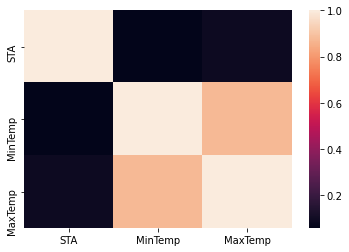

In [16]:
sns.heatmap(dataset.corr())

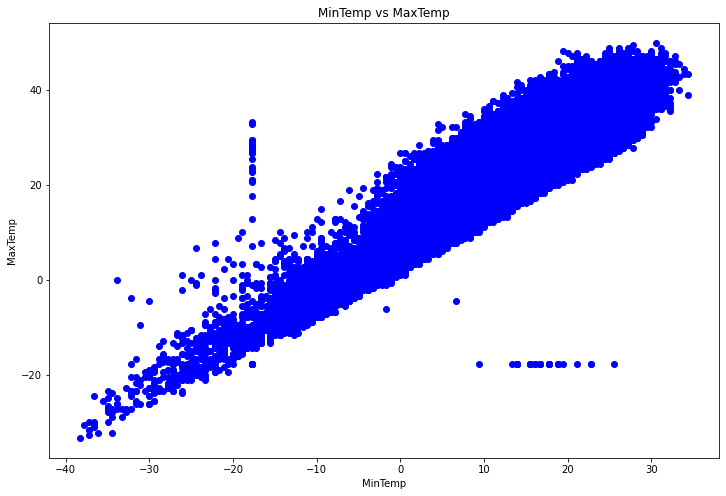

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(dataset['MinTemp'],dataset['MaxTemp'],c='b',marker='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

In [30]:
X = dataset['MinTemp'].values.reshape(-1,1)
X

array([[22.22222222],
       [21.66666667],
       [22.22222222],
       ...,
       [18.33333333],
       [18.33333333],
       [17.22222222]])

In [31]:
X.shape

(119040, 1)

In [32]:
y = dataset['MaxTemp'].values.reshape(-1,1)
y

array([[25.55555556],
       [28.88888889],
       [26.11111111],
       ...,
       [28.33333333],
       [28.33333333],
       [29.44444444]])

In [33]:
y.shape

(119040, 1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
X_train


array([[22.22222222],
       [17.77777778],
       [-9.44444444],
       ...,
       [ 3.33333333],
       [10.        ],
       [15.55555556]])

In [36]:
X_train.shape

(95232, 1)

In [37]:
y_train

array([[27.22222222],
       [32.77777778],
       [ 8.88888889],
       ...,
       [ 4.44444444],
       [14.44444444],
       [21.11111111]])

In [38]:
y_train.shape

(95232, 1)

In [39]:
X_test

array([[25.        ],
       [21.11111111],
       [17.22222222],
       ...,
       [23.88888889],
       [21.66666667],
       [22.77777778]])

In [40]:
X_test.shape

(23808, 1)

In [41]:
y_test

array([[28.88888889],
       [31.11111111],
       [27.22222222],
       ...,
       [31.11111111],
       [31.11111111],
       [36.66666667]])

In [42]:
y_test.shape

(23808, 1)

In [44]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [45]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[10.66185201]
[[0.92033997]]


In [46]:
print("Y= {0} x + {1} ".format(float(regressor.intercept_),float(regressor.coef_[0])))

Y= 10.661852008651103 x + 0.9203399663580369 


In [47]:
y_pred = regressor.predict(X_test)

In [52]:
X_test

array([[25.        ],
       [21.11111111],
       [17.22222222],
       ...,
       [23.88888889],
       [21.66666667],
       [22.77777778]])

In [48]:
y_pred

array([[33.67035117],
       [30.0912513 ],
       [26.51215143],
       ...,
       [32.64775121],
       [30.60255128],
       [31.62515124]])

In [49]:
y_pred.shape

(23808, 1)

In [50]:
y_test

array([[28.88888889],
       [31.11111111],
       [27.22222222],
       ...,
       [31.11111111],
       [31.11111111],
       [36.66666667]])

In [53]:
arr=np.array([1,2,3,4,5,6])
arr=arr.reshape(2,3)

In [54]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [55]:
arr=arr.flatten()
arr

array([1, 2, 3, 4, 5, 6])

In [56]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
...,...,...
23803,32.777778,32.136451
23804,32.222222,29.068651
23805,31.111111,32.647751
23806,31.111111,30.602551


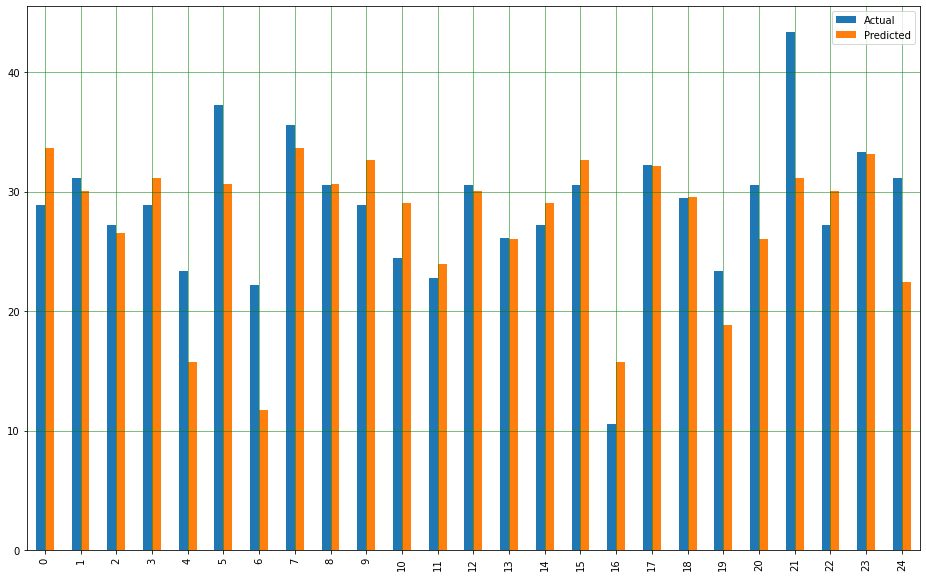

In [63]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(linewidth='0.5', color='green')
plt.show()

In [64]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  

Mean Absolute Error: 3.1993291783785835


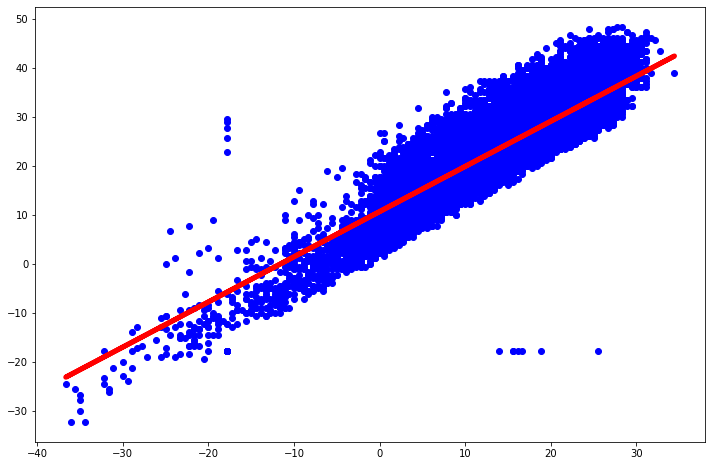

In [74]:
plt.figure(figsize=(12,8))
plt.scatter(X_test, y_test,  color='b')
plt.plot(X_test, y_pred, color='red', linewidth=5)
plt.show()